In [77]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
data_in_out_region = db['data_in_out_region']
data_in_out_region = data_in_out_region.find()
data_in_out_region = pd.DataFrame(data_in_out_region)
data_in_destination_type = db['data_in_destination_type']
data_in_destination_type = data_in_destination_type.find()
data_in_destination_type = pd.DataFrame(data_in_destination_type)


# 유입 지역 분포

In [78]:
data_in_out_region_gg = data_in_out_region.query("region_out=='경기'")
data_in_out_region_gw = data_in_out_region.query("region_out=='강원'")

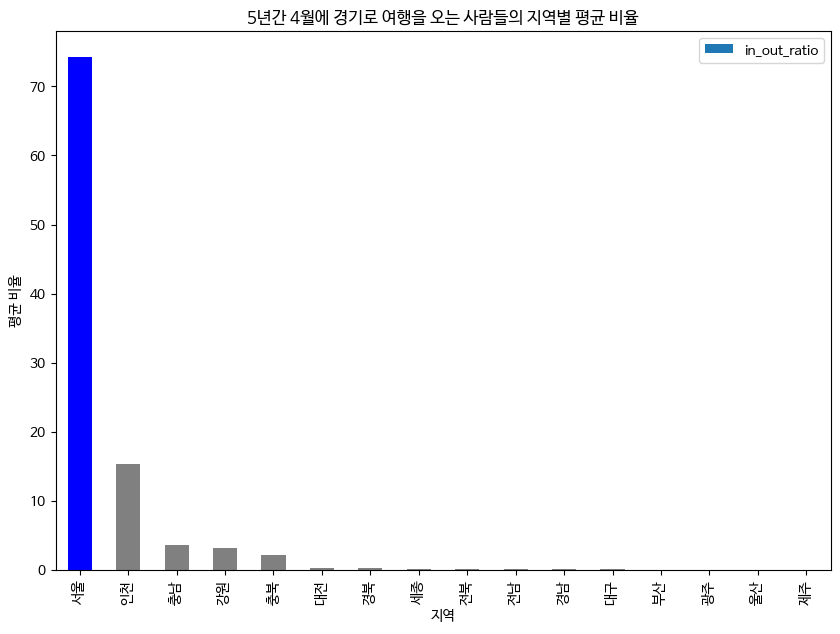

In [89]:
pivot_in_out_region_gg = pd.pivot_table(data_in_out_region_gg,index='region_in',values='in_out_ratio',aggfunc='mean')
pivot_in_out_region_gg = pivot_in_out_region_gg.sort_values("in_out_ratio",ascending=False)

ax = pivot_in_out_region_gg.plot(kind='bar', stacked=True, figsize=(10, 7))
for patch in ax.patches:
    patch.set_facecolor('grey')
ax.patches[0].set_facecolor('Blue')

plt.title('5년간 4월에 경기로 여행을 오는 사람들의 지역별 평균 비율')
plt.xlabel('지역')
plt.ylabel('평균 비율')

# 그래프 표시
plt.show()

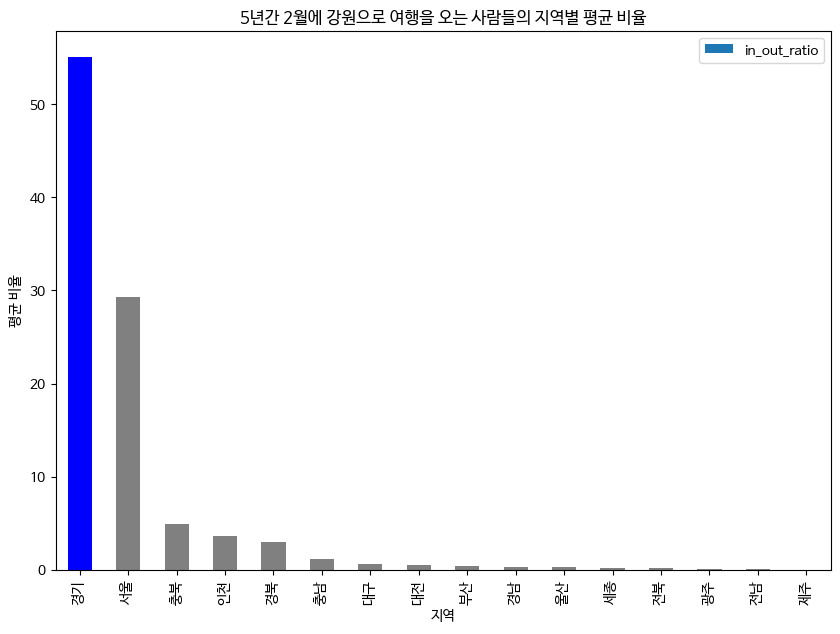

In [90]:
pivot_in_out_region_gw = pd.pivot_table(data_in_out_region_gw,index='region_in',values='in_out_ratio',aggfunc='mean')
pivot_in_out_region_gw = pivot_in_out_region_gw.sort_values("in_out_ratio",ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
ax = pivot_in_out_region_gw.plot(kind='bar', stacked=True, figsize=(10, 7))

for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[0].set_facecolor('Blue')

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 2월에 강원으로 여행을 오는 사람들의 지역별 평균 비율')
plt.xlabel('지역')
plt.ylabel('평균 비율')

# 그래프 표시
plt.show()

# 유입 유형 분포

In [81]:
data_in_destination_type_gg = data_in_destination_type.query("region=='경기'")
data_in_destination_type_gw = data_in_destination_type.query("region=='강원'")

In [82]:
data_in_destination_type_gw = data_in_destination_type_gw.query("cate_major != '기타관광'")
data_in_destination_type_gg = data_in_destination_type_gg.query("cate_major != '기타관광'")

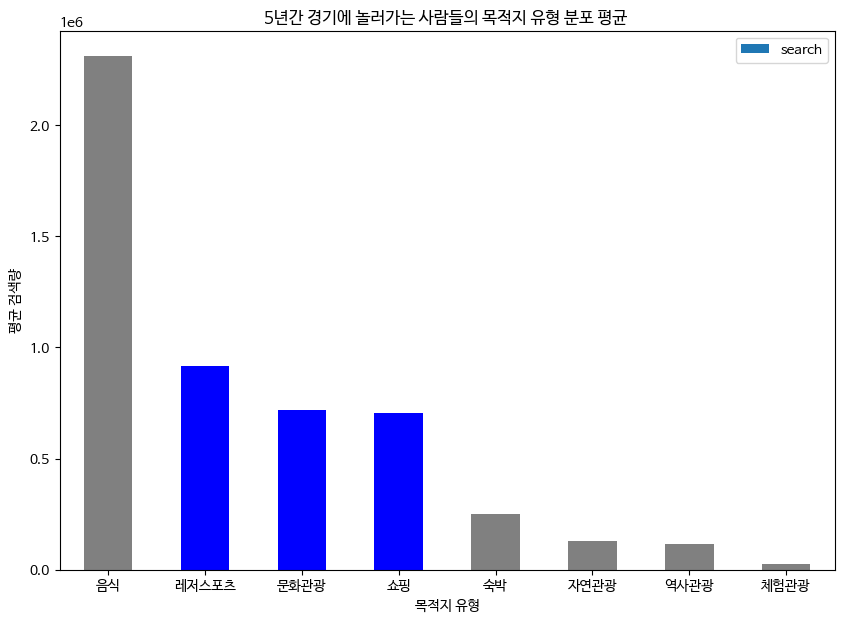

In [83]:
pivot_in_destination_type_gg = pd.pivot_table(data_in_destination_type_gg,index='cate_major',values='search',aggfunc='sum')
pivot_in_destination_type_gg = pivot_in_destination_type_gg.sort_values("search",ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
ax = pivot_in_destination_type_gg.plot(kind='bar', stacked=True, figsize=(10, 7))
for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[1].set_facecolor('Blue')
ax.patches[2].set_facecolor('Blue')
ax.patches[3].set_facecolor('Blue')
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 경기에 놀러가는 사람들의 목적지 유형 분포 평균 ')
plt.xlabel('목적지 유형')
plt.ylabel('평균 검색량')
plt.xticks(rotation=0)

# 그래프 표시
plt.show()

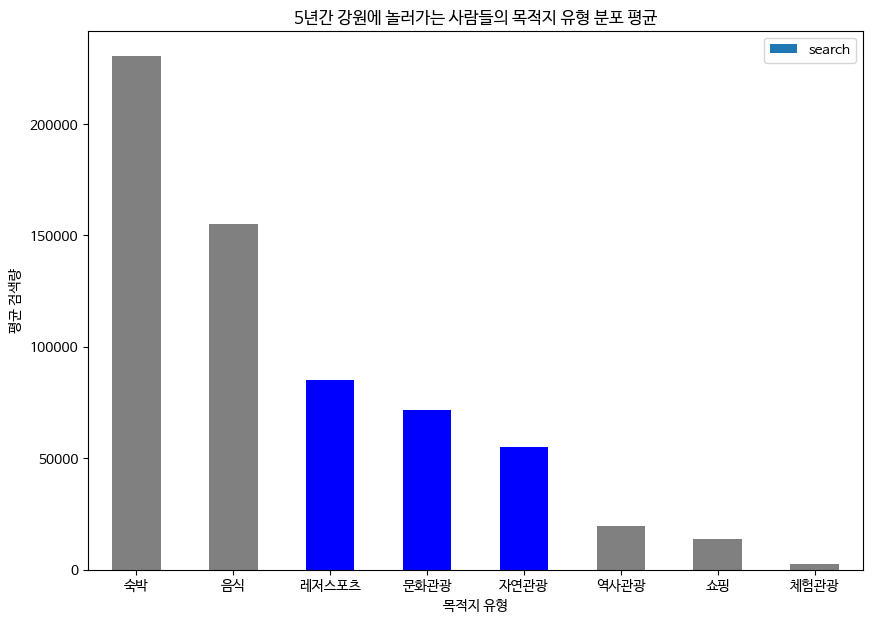

In [84]:
import matplotlib.pyplot as plt

# ... (이전 코드)
pivot_in_destination_type_gw = pd.pivot_table(data_in_destination_type_gw,index='cate_major',values='search',aggfunc='sum')
pivot_in_destination_type_gw = pivot_in_destination_type_gw.sort_values("search",ascending=False)
# 바차트 그리기
ax = pivot_in_destination_type_gw.plot(kind='bar', stacked=True, figsize=(10, 7))

for patch in ax.patches:
    patch.set_facecolor('grey')

# 첫 번째와 두 번째 막대를 파란색으로 변경
ax.patches[2].set_facecolor('Blue')
ax.patches[3].set_facecolor('Blue')
ax.patches[4].set_facecolor('Blue')
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 강원에 놀러가는 사람들의 목적지 유형 분포 평균')
plt.xlabel('목적지 유형')
plt.ylabel('평균 검색량')
plt.xticks(rotation=0)

# 그래프 표시
plt.show()